<a href="https://colab.research.google.com/github/JahnnobiRahman/Image-Processing/blob/main/1603080.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import cv2
import numpy as np
import math
import os
from google.colab.patches import cv2_imshow






In [31]:
def bitRate(width,height,bit) : 
  return (bit*8) / (height*width)



def entropy (img):
  p = np.array ([(img==v).sum() for v in range (256)])
  p = p/p.sum()

  entropy = -(p[p>0]*np.log2(p[p>0])).sum()
  return entropy 



In [32]:
img = cv2.imread(r"/content/p1.png", cv2.IMREAD_GRAYSCALE)
bit = os.stat('/content/p1.png').st_size

##gray = rgb2gray(img);
[row , col] = img.shape

print("Entropy of Image : ", entropy(img))
print("Bit Rate is : ", bitRate(row,col,bit)," bits/pixel")


Entropy of Image :  6.9581910686962
Bit Rate is :  7.630703125  bits/pixel


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in ubyte_scalars
  # This is added back by InteractiveShellApp.init_path()


Prediction Image : A 
Entropy of Image :  3.2973775438281705
Bit Rate is :  2.5518359375  bits/pixel


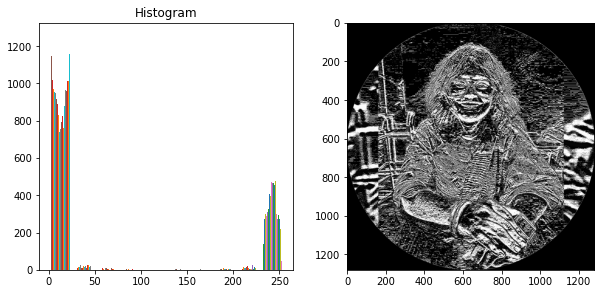

In [43]:
error1 = np.zeros([row, col]);
for i in range(row):
  for j in range(col):
    if(i == 1):
      if(j == 1):
        predict = 0;
      else:
        predict = img[i,j-1];
    else:
      predict = img[i-1,j];
    error1[i,j] = img[i,j] - predict;



plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.hist(error1)
plt.title('Histogram')


plt.subplot(2,2,2)
##plt.hist(error)
##plt.title('Histogram')
from PIL import Image
img1 = Image.fromarray(error1)
plt.imshow(img1)


bit1 = os.stat('/content/i1.png').st_size

print("Prediction Image : A ")
print("Entropy of Image : ", entropy(error1))
print("Bit Rate is : ", bitRate(row,col,bit1)," bits/pixel")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in ubyte_scalars
  # This is added back by InteractiveShellApp.init_path()


Prediction Image : B 
Entropy of Image :  3.404295929912603
Bit Rate is :  0.654462890625  bits/pixel


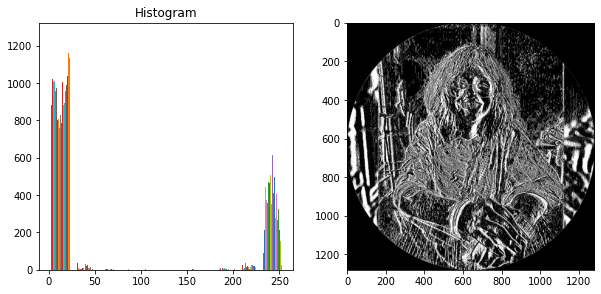

In [44]:
error2 = np.zeros([row, col]);
for i in range(row):
  for j in range(col):
    if(j == 1):
      if(i == 1):
        predict = 0;
      else:
        predict = img[i-1,j];
    else:
      predict = img[i,j-1];
    error2[i,j] = img[i,j] - predict;
##error2 = jpg_loss_error_gray2(gray);
##error3 = jpg_loss_error_gray3(gray);


plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.hist(error2)
plt.title('Histogram')

plt.subplot(2,2,2)
##plt.hist(error)
##plt.title('Histogram')
from PIL import Image
img2 = Image.fromarray(error2)
plt.imshow(img2)


bit2 = os.stat('/content/i2.png').st_size

print("Prediction Image : B ")
print("Entropy of Image : ", entropy(error2))
print("Bit Rate is : ", bitRate(row,col,bit2)," bits/pixel")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in ubyte_scalars
  del sys.path[0]


Prediction Image : C 
Entropy of Image :  3.803963948644464
Bit Rate is :  0.6843310546875  bits/pixel


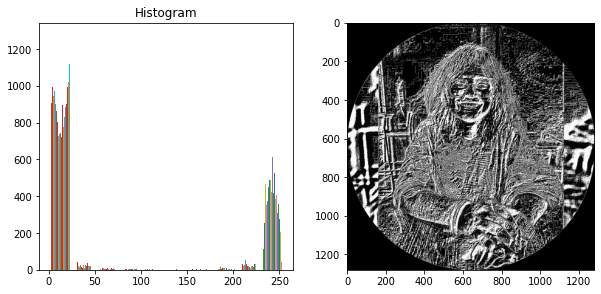

In [45]:
error3 = np.zeros([row, col]);
for i in range(1, row):
  for j in range(1, col):
    if(i == 1 or j == 1):
      if(i != 1):
        predict = img[i-1,j];
      elif(j != 1):
        predict = img[i,j-1]
      else: 
        predict = 0;
    else:
      predict = (img [i-1,j-1])
    error3[i,j] = img[i,j] - predict;
##error2 = jpg_loss_error_gray2(gray);
##error3 = jpg_loss_error_gray3(gray);


plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.hist(error3)
plt.title('Histogram')

plt.subplot(2,2,2)
from PIL import Image
img3 = Image.fromarray(error3)
plt.imshow(img3)


bit3 = os.stat('/content/i3.png').st_size

print("Prediction Image : C ")
print("Entropy of Image : ", entropy(error3))
print("Bit Rate is : ", bitRate(row,col,bit3)," bits/pixel")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in ubyte_scalars
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in ubyte_scalars
  if sys.path[0] == '':


Prediction Image : A+B-C 
Entropy of Image :  2.761777362432474
Bit Rate is :  0.5883251953125  bits/pixel


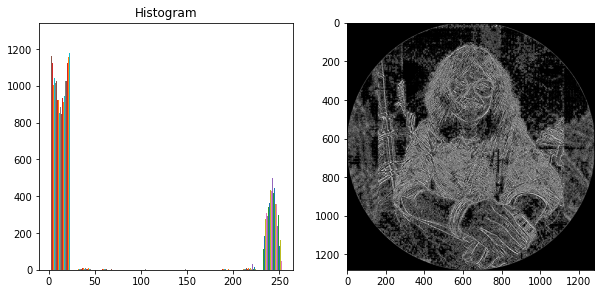

In [50]:
error4 = np.zeros([row, col]);
for i in range(1, row):
  for j in range(1, col):
    if(i == 1 or j == 1):
      if(i != 1):
        predict = img[i-1,j];
      elif(j != 1):
        predict = img[i,j-1]
      else: 
        predict = 0;
    else:
      predict = (img[i,j-1]+ img[i-1,j] - img [i-1,j-1])
    error4[i,j] = img[i,j] - predict;
##error2 = jpg_loss_error_gray2(gray);
##error3 = jpg_loss_error_gray3(gray);


plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.hist(error4)
plt.title('Histogram')

plt.subplot(2,2,2)
from PIL import Image
img4 = Image.fromarray(error4)
plt.imshow(img4)


bit4 = os.stat('/content/i4.png').st_size

print("Prediction Image : A+B-C ")
print("Entropy of Image : ", entropy(error4))
print("Bit Rate is : ", bitRate(row,col,bit4)," bits/pixel")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in ubyte_scalars
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in ubyte_scalars
  if sys.path[0] == '':


Prediction Image : ( A + (B- C) / 2 ) 
Entropy of Image :  1.2617984259307413
Bit Rate is :  0.131923828125  bits/pixel


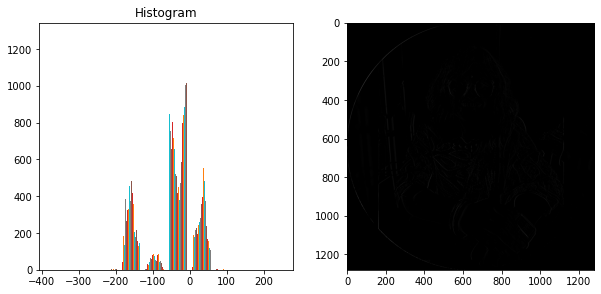

In [46]:
error5 = np.zeros([row, col]);
for i in range(1, row):
  for j in range(1, col):
    if(i == 1 or j == 1):
      if(i != 1):
        predict = img[i-1,j];
      elif(j != 1):
        predict = img[i,j-1]
      else: 
        predict = 0;
    else:
      predict = (img[i,j-1]+ (img[i-1,j] - img [i-1,j-1])/2)
    error5[i,j] = img[i,j] - predict;
##error2 = jpg_loss_error_gray2(gray);
##error3 = jpg_loss_error_gray3(gray);


plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.hist(error5)
plt.title('Histogram')

plt.subplot(2,2,2)
from PIL import Image
img5 = Image.fromarray(error5)
plt.imshow(img5)


bit5 = os.stat('/content/i5.png').st_size

print("Prediction Image : ( A + (B- C) / 2 ) ")
print("Entropy of Image : ", entropy(error5))
print("Bit Rate is : ", bitRate(row,col,bit5)," bits/pixel")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in ubyte_scalars
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in ubyte_scalars
  if sys.path[0] == '':


Prediction Image : (B + ( A - C) / 2 )  
Entropy of Image :  1.1827390753234368
Bit Rate is :  0.1358837890625  bits/pixel


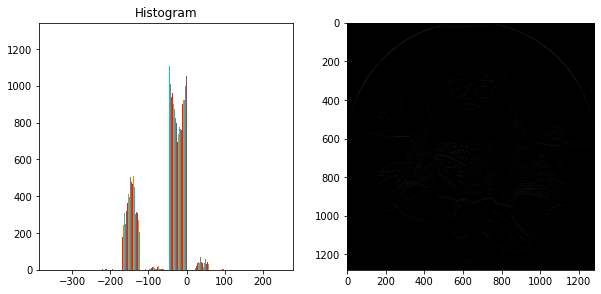

In [51]:
error6 = np.zeros([row, col]);
for i in range(1, row):
  for j in range(1, col):
    if(i == 1 or j == 1):
      if(i != 1):
        predict = img[i-1,j];
      elif(j != 1):
        predict = img[i,j-1]
      else: 
        predict = 0;
    else:
      predict = (img[i-1,j]+ (img[i,j-1] - img [i-1,j-1])/2)
    error6[i,j] = img[i,j] - predict;
##error2 = jpg_loss_error_gray2(gray);
##error3 = jpg_loss_error_gray3(gray);


plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.hist(error6)
plt.title('Histogram')

plt.subplot(2,2,2)
from PIL import Image
img6 = Image.fromarray(error6)
plt.imshow(img6)

bit6 = os.stat('/content/i6.png').st_size

print("Prediction Image : (B + ( A - C) / 2 )  ")
print("Entropy of Image : ", entropy(error6))
print("Bit Rate is : ", bitRate(row,col,bit6)," bits/pixel")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in ubyte_scalars
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in ubyte_scalars
  if sys.path[0] == '':


Prediction Image : ( (A + B ) / 2 ) 
Entropy of Image :  2.976678491479912
Bit Rate is :  0.3113916015625  bits/pixel


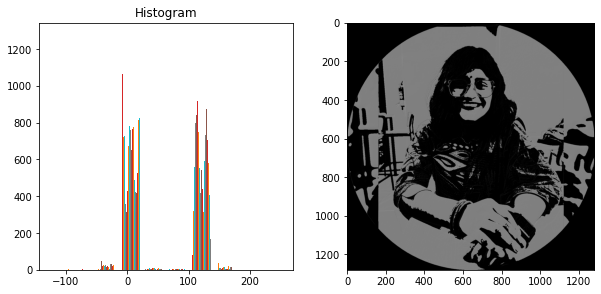

In [47]:
error7 = np.zeros([row, col]);
for i in range(1, row):
  for j in range(1, col):
    if(i == 1 or j == 1):
      if(i != 1):
        predict = img[i-1,j];
      elif(j != 1):
        predict = img[i,j-1]
      else: 
        predict = 0;
    else:
      predict = (img[i-1,j]+ img[i,j-1])/2
    error7[i,j] = img[i,j] - predict;
##error2 = jpg_loss_error_gray2(gray);
##error3 = jpg_loss_error_gray3(gray);


plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.hist(error7)
plt.title('Histogram')

plt.subplot(2,2,2)
from PIL import Image
img7 = Image.fromarray(error7)
plt.imshow(img7)

bit7 = os.stat('/content/i7.png').st_size

print("Prediction Image : ( (A + B ) / 2 ) ")
print("Entropy of Image : ", entropy(error7))
print("Bit Rate is : ", bitRate(row,col,bit7)," bits/pixel")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in ubyte_scalars
  if sys.path[0] == '':


Prediction Image : LocoI 
Entropy of Image :  6.962806440808905
Bit Rate is :  0.356318359375  bits/pixel


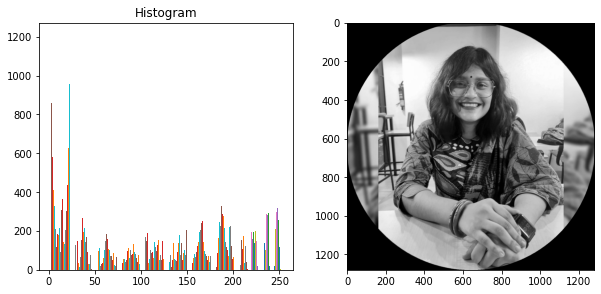

In [48]:
locoI = np.zeros([row, col]);
for i in range(row):
  for j in range(col):
    A = img[i-1,j]
    B = img[i,j-1]
    C = img[i-1,j-1]
    if(C >= max(A,B)):
      locoI[i,j] = min(A, B)
    elif(C <= min(A,B)):
      locoI[i,j] = max(A,B)
    else:
      locoI[i,j] = A + B - C


plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.hist(locoI)
plt.title('Histogram')

plt.subplot(2,2,2)
from PIL import Image
img8 = Image.fromarray(locoI)
plt.imshow(img8)


bit8 = os.stat('/content/i8.png').st_size

print("Prediction Image : LocoI ")
print("Entropy of Image : ", entropy(locoI))
print("Bit Rate is : ", bitRate(row,col,bit8)," bits/pixel")